In [4]:
import pandas as pd
import os
import shutil
import numpy as np
import glob
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

XML_folder='Gt_annotations/'
Pre_Files_dir='Predicted/'

File_name_change_Dir=XML_folder.replace('/','').replace('\\','')+'_INT_Fortmat'
Ground_truth_json=XML_folder.replace('/','').replace('\\','')+'.json'
Files_names_data_path=Pre_Files_dir.replace('/','').replace('\\','')+'.csv'

Files=os.listdir(XML_folder)
if not os.path.exists(File_name_change_Dir):
    os.mkdir(File_name_change_Dir)

Files_names_data=[]
for file in Files:
    shutil.copy(XML_folder+'/'+file,File_name_change_Dir+'/'+str(Files.index(file))+'.xml')
    Files_names_data.append([file,str(Files.index(file))+'.xml'])

Files_names_data=pd.DataFrame(Files_names_data,columns=['Old File Name','New File Name'])

from voc2coco import convert
xml_files = glob.glob(os.path.join(File_name_change_Dir, "*.xml"))
print("Number of xml files: {}".format(len(xml_files)))
# convert(xml_files, Ground_truth_json)

with open(Ground_truth_json,'r') as f:
    Data_gt=json.load(f)

Actual_Files_names=pd.DataFrame([[g['file_name'].split('\\')[-1],g['id']] for g in Data_gt['images']],columns=['Imagename','id'])
Pre_Files=os.listdir(Pre_Files_dir)
Data_predicted_json=[]
for ii in range(len(Pre_Files)):
#     print(ii)
    with open(Pre_Files_dir+'/'+Pre_Files[ii],'r') as f:
        prefile_data=f.read().split('\n')
        prefile_data=[g.split() for g in prefile_data if g!='']
        if len(prefile_data)==0:
            continue
        prefile_data=np.array(prefile_data)
        prefile_data=prefile_data.astype(object)
        prefile_data[:,1]=prefile_data[:,1].astype(float)
        prefile_data[:,2:]=prefile_data[:,2:].astype(int)
        
    File_new_name=Files_names_data[Files_names_data['Old File Name']==Pre_Files[ii].replace('.txt','.xml')]['New File Name'].values
    if len(File_new_name)==0:
        File_new_name=Files_names_data[Files_names_data['Old File Name']==Pre_Files[ii].replace('.txt','.pdf.xml')]['New File Name'].values
        if len(File_new_name)==0:
            continue
        File_new_name=File_new_name[0]
    else:
        File_new_name=File_new_name[0]
    Image_id=Actual_Files_names[Actual_Files_names['Imagename']==File_new_name.replace('.xml','.png')]['id'].values
    if len(Image_id)==0:
        Image_id=Actual_Files_names[Actual_Files_names['Imagename']==File_new_name.replace('.xml','.jpg')]['id'].values
    for g in prefile_data:
        _,score,x1,y1,x2,y2=g
        Data_predicted_json.append({"image_id":20200000001+Image_id[0],"category_id":1,"bbox":[x1,y1,x2-x1,y2-y1],"score":score})

cocoGt=COCO(Ground_truth_json)
cocoDt=cocoGt.loadRes(Data_predicted_json)

cocoEval = COCOeval(cocoGt,cocoDt,'bbox')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Number of xml files: 2877
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...


AssertionError: Results do not correspond to current coco set

In [5]:
with open('Gt_annotations_INT_Fortmat.json','r') as f:
    Gt_annotations_INT_Fortmat=json.load(f)

In [8]:
Count=[i for i in range(len(Gt_annotations_INT_Fortmat['annotations'])) if Gt_annotations_INT_Fortmat['annotations'][i]['image_id']==20200000363]
len(Count),[Gt_annotations_INT_Fortmat['annotations'][g]['bbox'] for g in Count]

(1, [[150, 716, 602, 273]])

In [9]:
Count=[i for i in range(len(Data_predicted_json)) if Data_predicted_json[i]['image_id']==20200000364]
len(Count),[Data_predicted_json[g]['bbox'] for g in Count]

(4,
 [[98, 112, 674, 155],
  [92, 760, 681, 257],
  [86, 526, 685, 199],
  [75, 520, 689, 526]])

6384

In [197]:
Areas=[Gt_annotations_INT_Fortmat['annotations'][i]['area'] for i in range(len(Gt_annotations_INT_Fortmat['annotations']))]

In [199]:
np.sort(Areas)

array([   260,    260,    260, ..., 166216, 202496, 564848])

In [14]:
Pre_Files[ii]

'07042015_CambridgeAr2014-page102.txt'

In [15]:
Data_predicted_json=[]
for ii in range(len(Pre_Files)):
    with open(Pre_Files_dir+'/'+Pre_Files[ii],'r') as f:
        prefile_data=f.read().split('\n')
        prefile_data=[g.split() for g in prefile_data if g!='']
        if len(prefile_data)==0:
            continue
        prefile_data=np.array(prefile_data)
        prefile_data=prefile_data.astype(object)
        prefile_data[:,1]=prefile_data[:,1].astype(float)
        prefile_data[:,2:]=prefile_data[:,2:].astype(int)
    for i in range(len(Gt_annotations_INT_Fortmat['images'])):
        if Gt_annotations_INT_Fortmat['images'][i]['file_name']==Pre_Files[ii].replace('.txt','.pdf.png'):
            tmp_imgid=Gt_annotations_INT_Fortmat['images'][i]['id']
    for g in prefile_data:
        _,score,x1,y1,x2,y2=g
        Data_predicted_json.append({"image_id":tmp_imgid,"category_id":1,"bbox":[x1,y1,x2-x1,y2-y1],"score":score})

In [28]:
20200000001,20200000364
category_id=1

(20200000001, 20200000364)

In [25]:
cocoGt=COCO('Gt_annotations_INT_Fortmat.json')

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [26]:
cocoDt=cocoGt.loadRes(Data_predicted_json)

cocoEval = COCOeval(cocoGt,cocoDt,iouType='bbox')
# cocoEval.params.areaRng = [[0, 564849], [0, 564849], [0 ,564849], [0,564849]]
# cocoEval.params.maxDets=[1,100,1000]
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.54s).
Accumulating evaluation results...
DONE (t=0.91s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.002
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.007
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

In [193]:
cocoEval.params.areaRng

[[0, 10000000000.0], [0, 400], [400, 900], [900, 10000000000.0]]

In [200]:
260,564848

(260, 564848)

In [2]:
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.802
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.851
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.851
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.433
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.978
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.020
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.191
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.817
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.435
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.820
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.985

{'image_id': 363,
 'category_id': 0,
 'bbox': [562, 147, 63, 15],
 'score': 0.99,
 'segmentation': [[562, 147, 562, 162, 625, 162, 625, 147]],
 'area': 945,
 'id': 18261,
 'iscrowd': 0}

In [5]:
Files=glob.glob('Predicted/*')
Files[0]

'Predicted\\0_orignal.txt'

In [8]:
for i in range(len(Files)):
    with open(Files[i],'r') as f:
        data=f.read()
        data=data.replace('Cell 0.9','Cell 0.99')
    with open(Files[i],'w') as f:
        f.write(data)

In [28]:
!python map_on_folders.py

['10k_m5']
Number of xml files: 6973
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.21s).
Accumulating evaluation results...
DONE (t=0.44s).
10k_m5
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.587
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.784
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.700
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.589
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.510
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.646
 Average Recall     

In [1]:
import tensorflow as tf
def resize_to_range(image,masks=None,min_dimension=None,max_dimension=None,method=tf.image.ResizeMethod.BILINEAR,
                    align_corners=False,pad_to_max_dimension=False,per_channel_pad_value=(0, 0, 0)):
    """Resizes an image so its dimensions are within the provided value.

    The output size can be described by two cases:
    1. If the image can be rescaled so its minimum dimension is equal to the
     provided value without the other dimension exceeding max_dimension,
     then do so.
    2. Otherwise, resize so the largest dimension is equal to max_dimension.

    Args:
    image: A 3D tensor of shape [height, width, channels]
    masks: (optional) rank 3 float32 tensor with shape
           [num_instances, height, width] containing instance masks.
    min_dimension: (optional) (scalar) desired size of the smaller image
                   dimension.
    max_dimension: (optional) (scalar) maximum allowed size
                   of the larger image dimension.
    method: (optional) interpolation method used in resizing. Defaults to
            BILINEAR.
    align_corners: bool. If true, exactly align all 4 corners of the input
                   and output. Defaults to False.
    pad_to_max_dimension: Whether to resize the image and pad it with zeros
      so the resulting image is of the spatial size
      [max_dimension, max_dimension]. If masks are included they are padded
      similarly.
    per_channel_pad_value: A tuple of per-channel scalar value to use for
      padding. By default pads zeros.

    Returns:
    Note that the position of the resized_image_shape changes based on whether
    masks are present.
    resized_image: A 3D tensor of shape [new_height, new_width, channels],
      where the image has been resized (with bilinear interpolation) so that
      min(new_height, new_width) == min_dimension or
      max(new_height, new_width) == max_dimension.
    resized_masks: If masks is not None, also outputs masks. A 3D tensor of
      shape [num_instances, new_height, new_width].
    resized_image_shape: A 1D tensor of shape [3] containing shape of the
      resized image.

    Raises:
    ValueError: if the image is not a 3D tensor.
    """

    with tf.name_scope('ResizeToRange', values=[image, min_dimension]):
        if image.get_shape()[0] < image.get_shape()[1]:
#             new_image = tf.image.resize_images(image, tf.stack([min_dimension, max_dimension]), method=method,
#                                                align_corners=align_corners, preserve_aspect_ratio=True)
            new_image = tf.compat.v2.image.resize(image, tf.stack([min_dimension, max_dimension]),preserve_aspect_ratio=True)
        else:
            new_image = tf.image.resize_images(image, tf.stack([max_dimension, min_dimension]), method=method,
                                  align_corners=align_corners, preserve_aspect_ratio=True)
    return new_image

In [2]:
import cv2
import numpy as np
img=cv2.imread('BTH_AR2017_Annual_Report-page37.pdf.png')

In [32]:
size=(600,1024)
Image_resized=Image_manual_resize(img,size,keep_aspect_ratio=True)

In [28]:
def Image_manual_resize(img,size,keep_aspect_ratio=True):
    """
    [keep_aspect_ratio=False]: size=(width,height)
    [keep_aspect_ratio=True]: size=(min_dimension,max_dimension)
    """
    if keep_aspect_ratio:
        if img.shape[0]<img.shape[1]:
            size=[size[0],size[1]]
        else:
            size=[size[1],size[0]]
        current_height, current_width,_=img.shape
        scale_factor_height = (size[0]/current_height)
        scale_factor_width = (size[1] / current_width)
        scale_factor = min(scale_factor_height, scale_factor_width)

        scaled_height_const = round(scale_factor * current_height)
        scaled_width_const = round(scale_factor *current_width)
        return cv2.resize(img, (scaled_width_const,scaled_height_const), interpolation=cv2.INTER_LINEAR)
    else:
        return cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)

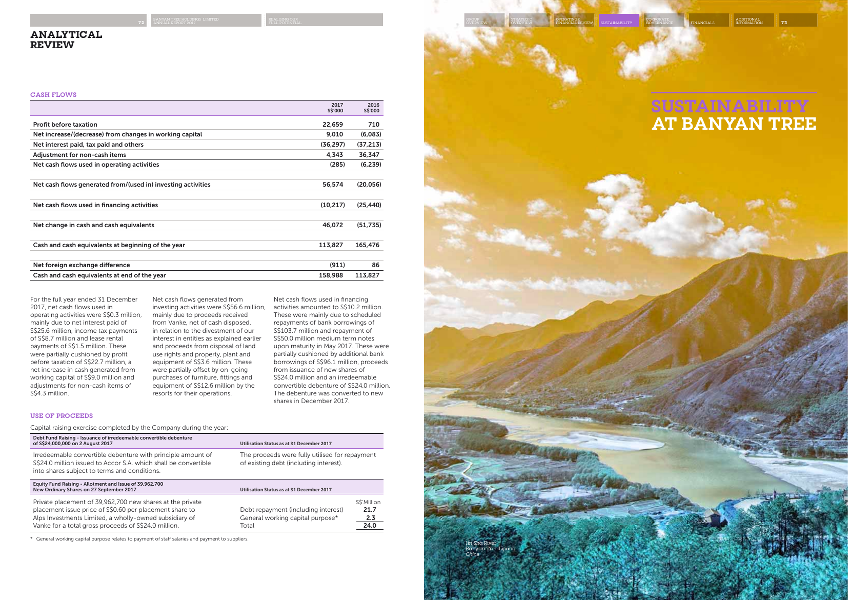

In [26]:
from PIL import Image
Image.fromarray(Image_resized)

In [3]:
b = tf.constant(img, dtype=tf.float32)
result=resize_to_range(b,masks=None,align_corners=True,min_dimension=600,max_dimension=1024)

In [14]:
b.get_shape().is_fully_defined(),b.get_shape().as_list()

(True, [1170, 1654, 3])

In [4]:
sess=tf.Session()
np_c = sess.run(result)
#     print np_c[0, :, :, 0]


In [16]:
np_c.shape

(600, 848, 3)

In [14]:
img.shape

(1170, 1654, 3)

In [5]:
sess=tf.Session()

In [10]:
sess.run(resize_to_range(tf.constant(img, dtype=tf.float32),masks=None,min_dimension=600,max_dimension=1024))[0]

array([[[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        ...,
        [2.05297119e+02, 1.52297119e+02, 7.29711914e+00],
        [2.09197998e+02, 1.56197998e+02, 1.12969971e+01],
        [2.10038208e+02, 1.59125854e+02, 3.32899170e+01]],

       [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        ...,
        [2.18307434e+02, 1.53457428e+02, 1.90000010e+00],
        [2.20453949e+02, 1.55603943e+02, 3.99304819e+00],
        [2.15556854e+02, 1.56180695e+02, 2.65430660e+01]],

       [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
        ...,
        [2.11899994e+02, 1.47600006e+02, 0.00000000e+00],
        [2.12909897e+02, 1.48

In [76]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [ ]:
# Score update.

In [10]:
directory='faster_rcnn_inception_resnet_v2/'
import os
import numpy as np

Files=os.listdir(directory)

for i in range(len(Files)):
    with open(directory+Files[i],'r') as f:
        data=f.read().split('\n')

    scores=np.array([float(d.split()[1]) for d in data if d!=''])
    rm_indexs=np.where(scores<0.7)[0]

    with open('faster_rcnn_inception_resnet_v2_2/'+Files[i],'w') as f:
        f.write('\n'.join(np.delete(np.array(data),rm_indexs).tolist()))